# Basics

Link [here](https://facebookincubator.github.io/prophet/docs/quick_start.html)

In [1]:
# Python
import sys
import os
import datetime
import pandas as pd
import numpy as np
from fbprophet import Prophet

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='pearl')
tls.set_credentials_file(username=os.environ.get('PLOTLY_USERNAME'),
                         api_key=os.environ.get('PLOTLY_APIKEY'))

import matplotlib as plt
%matplotlib inline

In [42]:
#infile = 'data/lower_atlantic_padd1c_weekly_diesel_prices.csv'
infile = 'data/nymex_no2_heatoil_nyharb_daily.csv'
df = pd.read_csv(infile)
df.head()

,Day,New York Harbor No. 2 Heating Oil Future Contract 1 $/gal
0,06/20/2017,1.395
1,06/19/2017,1.411
2,06/16/2017,1.427
3,06/15/2017,1.415
4,06/14/2017,1.410


In [43]:
# diesel prices
#date_field = 'Week of'
#data_field = 'Lower Atlantic (PADD 1C) No 2 Diesel Retail Prices $/gal'

# nymex futures
date_field = 'Day'
data_field = 'New York Harbor No. 2 Heating Oil Future Contract 1 $/gal'

# set ds and y fields
df['date'] = pd.to_datetime(df[date_field])
df['ds'] = df['date']
#df['y'] = np.log(df[data_field])
df['y'] = df[data_field]
df.head()

,Day,New York Harbor No. 2 Heating Oil Future Contract 1 $/gal,date,ds,y
0,06/20/2017,1.395,2017-06-20,2017-06-20,1.395
1,06/19/2017,1.411,2017-06-19,2017-06-19,1.411
2,06/16/2017,1.427,2017-06-16,2017-06-16,1.427
3,06/15/2017,1.415,2017-06-15,2017-06-15,1.415
4,06/14/2017,1.410,2017-06-14,2017-06-14,1.410


In [44]:
# file is in reverse time order
df = df[['ds', 'y']].iloc[::-1]

In [45]:
df.iplot(kind='scatter', x='ds', y='y')

In [46]:
# date mask
start_date = '2016-01-01'
end_date = '2020-01-01'
mask = (df['ds'] > start_date) & (df['ds'] <= end_date)
df = df.loc[mask]

In [47]:
df.iplot(kind='scatter', x='ds', y='y')

In [48]:
m = Prophet(yearly_seasonality=True,
            weekly_seasonality=True,
            changepoint_prior_scale=0.75)
m.fit(df);

In [49]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
390,2017-07-16
391,2017-07-17
392,2017-07-18
393,2017-07-19
394,2017-07-20


In [50]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
390,2017-07-16,1.133453,1.059458,1.204465
391,2017-07-17,1.174615,1.098065,1.257971
392,2017-07-18,1.158031,1.074771,1.243726
393,2017-07-19,1.146739,1.054817,1.229913
394,2017-07-20,1.132874,1.041869,1.218563


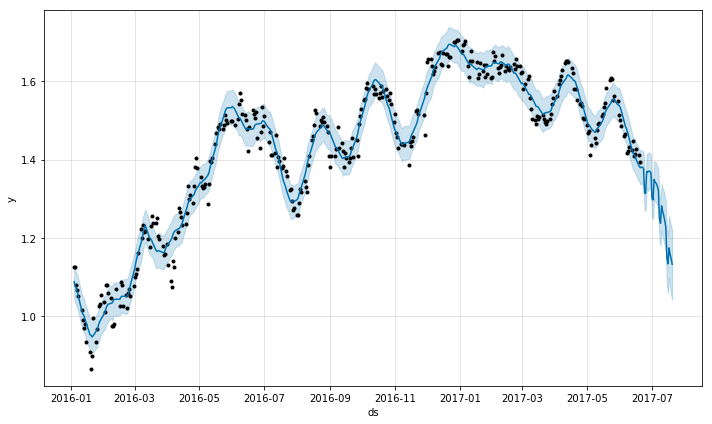

In [51]:
m.plot(forecast);

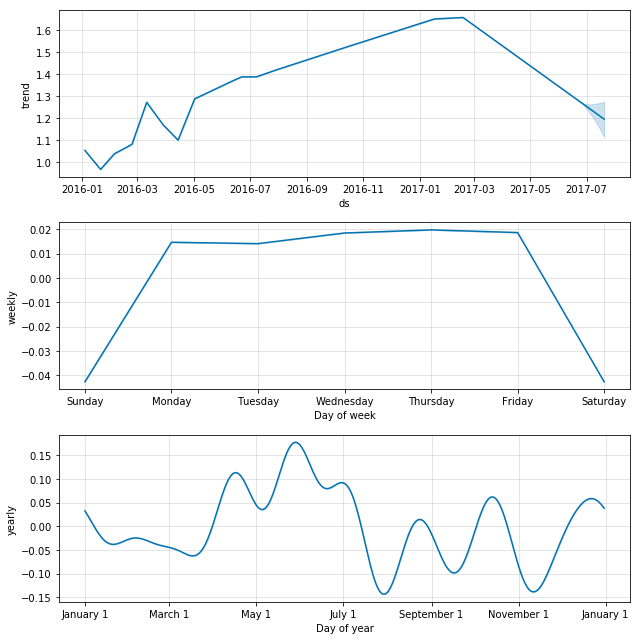

In [52]:
m.plot_components(forecast);

# Growth

Link [here](https://facebookincubator.github.io/prophet/docs/forecasting_growth.html)

In [ ]:
df['cap'] = 2

In [ ]:
m = Prophet(growth='logistic')
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 2
fcst = m.predict(future)
m.plot(fcst)

# Changepoints

Link [here](https://facebookincubator.github.io/prophet/docs/trend_changepoints.html)

In [ ]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
m.plot(forecast);

In [ ]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
m.plot(forecast)

In [ ]:
m = Prophet(changepoints=['2011-10-01'])
forecast = m.fit(df).predict(future)
m.plot(forecast);

# Holidays

Link [here](https://facebookincubator.github.io/prophet/docs/holiday_effects.html)

In [ ]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [ ]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

In [ ]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

In [ ]:
m.plot_components(forecast)

In [ ]:
m = Prophet(holidays=holidays, holidays_prior_scale=1).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

In [ ]:
m.plot(forecast)